 First steps in data science with Python 

# Installation

For new comers, I recommend using the Anacaonda distribution. You can download it from [here](https://www.continuum.io/downloads)

# The Python data science ecosystem

## Jupyter notebook

[Jupyter](https://jupyter.org/) notebook is the code environment we will be using today. <br>
Previously known as ipython notebook, it is an interactive environment that makes prototyping easier for data scientists.

## Pandas

[Pandas](http://pandas.pydata.org/) is the primary toolbox used for collecting and cleaning datasets from various data sources. <br>
Most of the concepts that we are exploring today can be found in the following great [cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

## Matplotlib

[Matplotlib](http://matplotlib.org/) is the standard and de facto Python library for creating visualizations.

## Numerical and statistical (numpy, scipy, statsmodels)

Alongside the above tools, Python offers a set of numerical and statistical packages to perform data analysis. 
The most famous ones are: 

* [numpy](http://www.numpy.org/): Base N-dimensional array package
* [scipy](https://www.scipy.org/scipylib/index.html): Fundamental library for scientific computing
* [statsmodels](http://www.statsmodels.org/stable/): Statistical computations and models for Python

Keep in mind that most of the capabilites of the above package are integrated within the Pandas library.

# Tidy data

This is a very important concept when doing data science

# Example

## Import pacakges

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import missingno as msno

## Loading data

[Kaggle](https://www.kaggle.com/) offers many free datasets with lots of metadata, descriptions, kernels, discussions and so on. <br>
Today, we will be working with the San Francisco Salaries dataset. You can download it from [here](https://www.kaggle.com/kaggle/sf-salaries) (you need a Kaggle account) or get it from the workshop [repository](https://github.com/yassineAlouini/first-steps-data-science/blob/master/data/Salaries.csv).

The dataset we will be working with is a CSV file. Fortunately for us, Pandas has a handy method `.read_csv`.
Let's try it out!

In [9]:
sf_slaries_df = pd.read_csv('data/Salaries.csv')

/home/yassine/anaconda3/envs/datacamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data exploration

In [11]:
sf_slaries_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [12]:
sf_slaries_df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [13]:
sf_slaries_df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [14]:
sf_slaries_df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [15]:
sf_slaries_df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


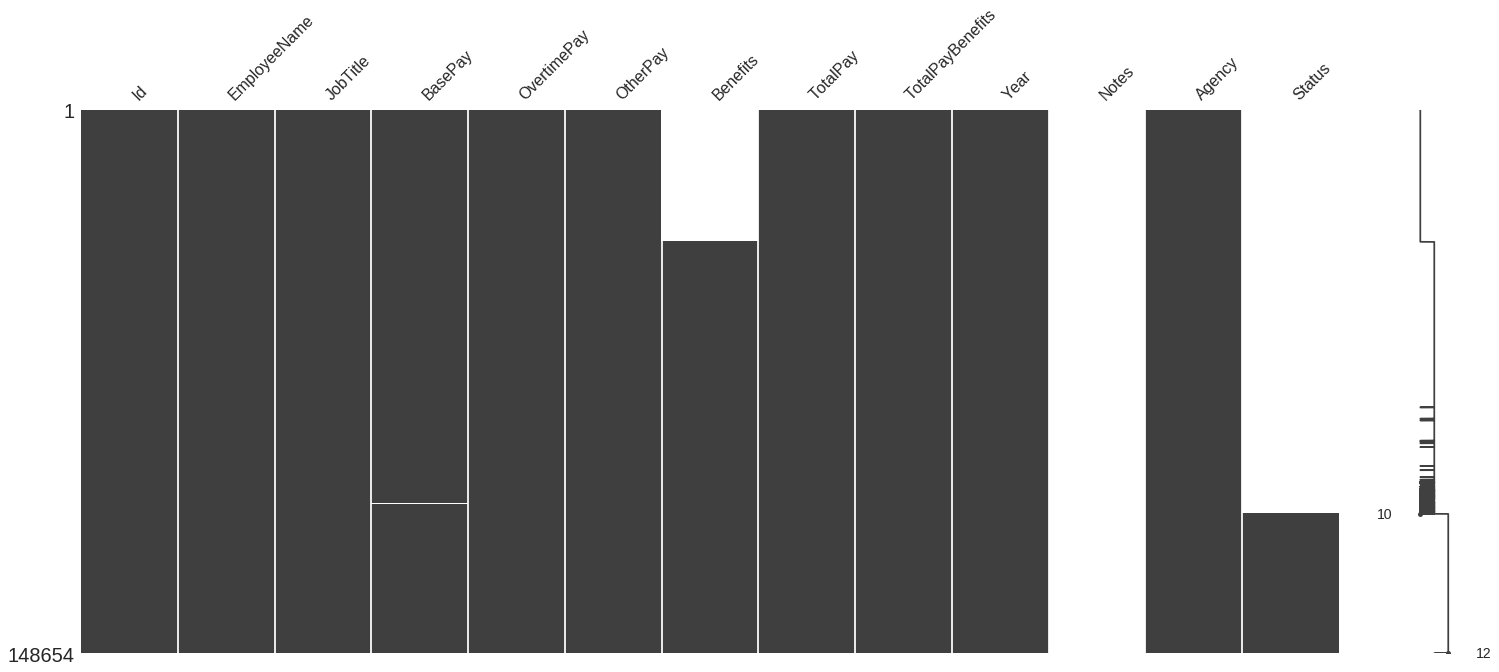

In [18]:
msno.matrix(sf_slaries_df)

## Some analysis

# To wrap up

In todays's workshop, you have learned: 

* About the Python data science ecosystem (some of its parts at least)
* The concept of a tidy dataset
* How to load a dataset using Pandas
* How to explore a dataset
* How to make simple plots

I hope this was insightful! <br>
See you at a next workshop hopefully.

# References/ To go beyond

I hope you have enjoyed this workshop. To continue learning, I recommend the following:
    
* A blog post on how to become a data scientist: https://www.dataquest.io/blog/how-to-become-a-data-scientist/ 
* Consider trying [dataquest](https://www.dataquest.io) and/or [datacamp](https://www.datacamp.com/) if you want to learn more about data science using Python. Notice that they both offer some free content but most of it is available for a monthly subscription
* [Quora](https://www.quora.com/): one of the best places to ask and answer questions about data science (and any other subject more generally)
* [Kaggle](https://www.kaggle.com/): this is a great place to hone your data science skills through producing and reading different kernels (these are their internal variation of notebooks)
* More generally follow great data scientists. Some that I really enjoy reading their work (in no particular order): 
    * [Wes Mckinney](http://wesmckinney.com/): original creator of Pandas.
    * [Tom Augspurger](https://tomaugspurger.github.io/): core contributor of Pandas. Has written the [modern Pandas](https://tomaugspurger.github.io/modern-1.html) blog posts series (a most read).
    * [Jake VanderPlas](http://staff.washington.edu/jakevdp/): a data scientist in academia (as he defines himself).